In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import torch
from torchvision import transforms
from torch.utils.data import Dataset, DataLoader

import os
import os.path
from os import path
import cv2
import json
import numpy as np
from glob import glob

In [25]:
data_root = './drive/MyDrive/NAS/CSED538/DL20'
print(path.exists(data_root))

True


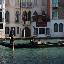

(64, 64, 3)


In [28]:
from google.colab.patches import cv2_imshow

example = os.path.join(data_root, 'train', '0', '101.png')
image = cv2.imread(example)
cv2_imshow(image)
print(np.shape(image))

In [48]:
class DL20dataset(Dataset):
  def __init__(self, data_root, is_Train=True, input_size=64, transform=None):
    super(DL20dataset, self).__init__()
    self.img_list = self._load_img_list(data_root, is_Train)

    self.len = len(self.img_list)
    self.input_size = input_size
    self.transform = transform

  def _load_img_list(self, data_root, is_Train):
    if is_Train:
      return glob(os.path.join(data_root, 'train', '*', '*.png'))
    else:
      return glob(os.path.join(data_root, 'test', '*', '*.png'))

  def __getitem__(self, index):
    img_path = self.img_list[index]

    # Image Loading
    image = cv2.imread(img_path)
    
    # Label is directory name
    label = img_path.split('/')[-2]
    return image, label

  def __len__(self):
    return self.len

In [54]:
dataset = DL20dataset(data_root, is_Train=True, input_size=64)
dataloader = DataLoader(dataset, batch_size=1, pin_memory=True, shuffle=True)

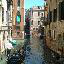

0


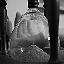

1


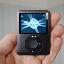

2


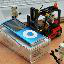

2


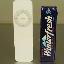

2


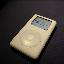

2


In [61]:
for i, (image, label) in enumerate(dataloader):
  if i > 5:
    break
  cv2_imshow(image[0].numpy())
  print(label[0])